For the past five years, you've honed your skills as a Senior Data Scientist for a global university. Your team leverages its data analytics and machine learning skill sets to help other departments make data-driven decisions. One such department is the procurement team, who is trying to decide the best new mobile phone to offer to the university's employees. For the last week, a Junior Data Scientist on your team has been developing a workflow to help provide insight to the procurement team. You will be reviewing their code to ensure it's ready to ship to production. 

The first chunk of code that you'll be reviewing is your colleague's function to prepare smartphone data from a CSV file for visualization. After ingesting and cleaning the smartphone data, your colleague has prepared a function to plot a variable passed to the function, versus `"price"`. However, within this function, there is code that does not adhere to DRY principles and is copied and pasted. Make sure to refactor the code appropriately, using the `column_to_label()` function defined below.

Wow, your colleague even included a unit test to ensure `NaN` values were removed from the cleaned DataFrame! However, it doesn't seem like the unit test is passing when executed. Re-work this unit test to ensure that it matches the transformation logic in the `prepare_smartphone_data()` function.

Once you've made changes to the `test_nan_values` unit test, you'll want to ensure that these unit tests execute with `ExitCode.OK`. This means that the `pytest` defined above has passed testing, and the code is one step closer to being to be shipped to production.

For context, there is a print statement in the `prepare_smartphone_data()` function in the first cell of the notebook below that can be used to visualize the dataset your Junior Data Engineer has been working with. Feel free to update this line of code as needed. This can then be removed after the dataset has been investigated. Best of luck!

In [24]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def prepare_smartphone_data(file_path):
    """ 
    Prepare the smartphone data by applying a number of transformations:
        - select the features that needed for later analysis
        - remove records without a battery_capacity value or OS values
        - Conver the price from cents to dollars. 
    
    :param file_path: str, the file path of the raw smartphone data (CSV format)
    :return: pandas.DataFrame, a cleaned dataset after above transformation
    """
    
    if os.path.exists(file_path):
        raw_data = pd.read_csv(file_path)
    else:
        raise Exception(f"File containing smartphone data not found at path {file_path}")

    columns_to_keep = [
        "brand_name",
        "os",
        "price",
        "avg_rating",
        "processor_speed",
        "battery_capacity",
        "screen_size"
    ]
    
    trimmed_data = raw_data.loc[:, columns_to_keep]
    trimmed_data.columns = trimmed_data.columns.str.strip()
    # Remove records without a battery_capacity value
    reduced_data = trimmed_data.dropna(subset=["battery_capacity", "os"])
    reduced_data = reduced_data.copy()
    # Divide the price column by 100 to find the dollar amount
    reduced_data["price"] = reduced_data["price"].astype(float)
    reduced_data.loc[:,"price"] = reduced_data.loc[:,"price"]/ 100
    return reduced_data


# Call the function
cleaned_data = prepare_smartphone_data("./data/smartphones.csv")

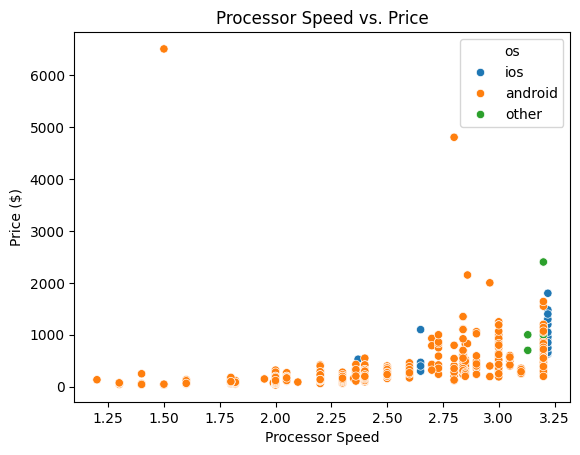

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt


def column_to_label(column_name):
    """
    Converts a column name in a pandas DataFrame to a string that can be
    used as a label in a plot.
    
    :param column_name: string containing original column name
    :return: string that is ready to be presented on a plot
    """
    
    # Validate that column_name is a string
    if isinstance(column_name, str):
        return " ".join(column_name.split("_")).title()
    
    # If the value provided is not a string, raise an Exception
    else:
        raise Exception("Please makes sure to pass a value of type 'str'.")


def visualize_versus_price(clean_data, x):
    """
    Use seaborn and matplotlib to identify a pattern between avg_rating and 
    battery_capacity.
    
    :param clean_data: a pandas DataFrame containing cleaned smartphone data
    :param x: variable to be plotted on the x-axis
    :return: None
    """
    
    # Create the scatterplot
    sns.scatterplot(x=x, y="price", data=clean_data, hue="os")
    
    # Add x and y labels
    plt.xlabel(column_to_label(x))
    plt.ylabel("Price ($)")
    
    # Add a title to the plot
    plt.title(f"{column_to_label(x)} vs. Price")
    
    
# Call the visualize_versus_price function
visualize_versus_price(cleaned_data, "processor_speed")


In [26]:
# Import required packages
import pytest
import ipytest

ipytest.config.rewrite_asserts = True
__file__ = "notebook.ipynb"


# Create a clean DataFrame fixture
@pytest.fixture()
def clean_smartphone_data():
    return prepare_smartphone_data("./data/smartphones.csv")

    
def test_nan_values(clean_smartphone_data):
    """
    Test for no NaN value for "battery_capacity" or "os"
    """
    
    # Assert there are no NaN value in "battery_capacity" or "os"
    assert clean_smartphone_data["battery_capacity"].isnull().sum() == 0
    assert clean_smartphone_data["os"].isnull().sum() == 0

    
ipytest.run("-qq")


.                                                                                            [100%]


<ExitCode.OK: 0>